In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import sys
np.set_printoptions(threshold=sys.maxsize)

Recherche d'hyperparamètre

In [9]:
datasets = ['highway', 'office', 'pedestrians', 'PETS2006']
Thresholds = [10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]
intersection_over_union_threshold = {} #Dictionnaire qui enregistre les valeurs de l'intersection over union pour chaque dataset et chaque threshold

for threshold in Thresholds:
    intersection_over_union_threshold[threshold] = {}
    for dataset in datasets:
        intersection_over_union_threshold[threshold][dataset] = []

for threshold in Thresholds:
    for dataset in datasets:
        #PATH
        input = 'dataset/dataset/baseline/' + dataset + '/input/'
        groundtruth = 'dataset/dataset/baseline/' + dataset + '/groundtruth/'
        
        #Liste des fichiers
        input_files = os.listdir(input)
        groundtruth_files = os.listdir(groundtruth)
        
        #Initialisation du background subtractor
        fgbg = cv2.createBackgroundSubtractorMOG2(varThreshold=threshold)
        fgmask = fgbg.apply(cv2.imread(input + input_files[0]))
        for picture in groundtruth_files:
            #On récupère le numéro de l'image
            number = int(picture[2:-4])
            
            #On récupère le nom du fichier input correspondant
            input_name = input_files[number-1]
            
            #On récupère les images
            input_image = cv2.imread(input + input_name)
            groundtruth_image = cv2.imread(groundtruth + picture)
            
            #On applique le background subtractor
            fgmask = fgbg.apply(input_image)
            
            #On convertit les images en array booléen pour pouvoir calculer l'intersection over union
            mask_array = np.array(fgmask,dtype=bool)
            groundtruth_array = np.array(groundtruth_image[:,:,0],dtype=bool)
            
            #On calcule l'intersection et l'union
            overlap = mask_array*groundtruth_array
            union = mask_array+groundtruth_array
            
            #On calcule et enregistre l'intersection over union
            IOU = overlap.sum()/float(union.sum())
            intersection_over_union_threshold[threshold][dataset].append(IOU)

#On remplace les valeurs NaN par 0
for threshold in Thresholds:
    for dataset in datasets:
        intersection_over_union_threshold[threshold][dataset] = np.nan_to_num(intersection_over_union_threshold[threshold][dataset], nan=0)

C:\Users\marc1\AppData\Local\Temp\ipykernel_204\3967078264.py:36: RuntimeWarning: invalid value encountered in divide
  IOU = overlap.sum()/float(union.sum())


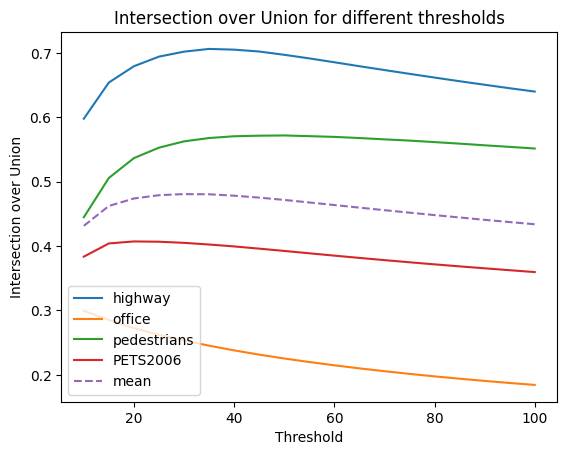

In [10]:
plot_intersection_over_union_threshold = {}
for dataset in datasets:
    plot_intersection_over_union_threshold[dataset] = []
    for threshold in Thresholds:
        plot_intersection_over_union_threshold[dataset].append(np.mean(intersection_over_union_threshold[threshold][dataset]))
        
#Calculate the mean of the intersection over union for each dataset
plot_intersection_over_union_threshold['mean'] = [0 for i in range(len(Thresholds))]
for threshold in Thresholds:
    for dataset in datasets:
        plot_intersection_over_union_threshold['mean'][Thresholds.index(threshold)] += np.mean(intersection_over_union_threshold[threshold][dataset])
plot_intersection_over_union_threshold['mean'] = [x / 4 for x in plot_intersection_over_union_threshold['mean']]
        
plt.figure()
for dataset in datasets:
    plt.plot(Thresholds, plot_intersection_over_union_threshold[dataset], label=dataset)
plt.plot(Thresholds, plot_intersection_over_union_threshold['mean'], label='mean', linestyle='--')
plt.xlabel('Threshold')
plt.ylabel('Intersection over Union')
plt.title('Intersection over Union for different thresholds')
plt.legend()
plt.show()

In [11]:
#Print best threshold for each dataset
for dataset in datasets:
    print('Best threshold for ' + dataset + ': ' + str(Thresholds[np.argmax(plot_intersection_over_union_threshold[dataset])]))
    print('Mean intersection over union for ' + dataset + 'with the best threshold: ' + str(np.max(plot_intersection_over_union_threshold[dataset])))
    

Best threshold for highway: 35
Mean intersection over union for highwaywith the best threshold: 0.7064030426165537
Best threshold for office: 10
Mean intersection over union for officewith the best threshold: 0.2995487292261766
Best threshold for pedestrians: 50
Mean intersection over union for pedestrianswith the best threshold: 0.5719564793598009
Best threshold for PETS2006: 20
Mean intersection over union for PETS2006with the best threshold: 0.4072960751614743


Résultats avec le dataset de base

In [12]:
datasets = ['highway', 'office', 'pedestrians', 'PETS2006']
intersection_over_union = {}

for dataset in datasets:
    intersection_over_union[dataset] = []


for dataset in datasets:
    input = 'dataset/dataset/baseline/' + dataset + '/input/'
    groundtruth = 'dataset/dataset/baseline/' + dataset + '/groundtruth/'
    
    input_files = os.listdir(input)
    groundtruth_files = os.listdir(groundtruth)
    
    fgbg = cv2.createBackgroundSubtractorMOG2(varThreshold=20)
    fgmask = fgbg.apply(cv2.imread(input + input_files[0]))
    for picture in groundtruth_files:
        number = int(picture[2:-4])
        
        input_name = input_files[number-1]
        
        input_image = cv2.imread(input + input_name)
        groundtruth_image = cv2.imread(groundtruth + picture)
        
        fgmask = fgbg.apply(input_image)
        
        mask_array = np.array(fgmask,dtype=bool)
        groundtruth_array = np.array(groundtruth_image[:,:,0],dtype=bool)
        
        overlap = mask_array*groundtruth_array
        union = mask_array+groundtruth_array
        
        IOU = overlap.sum()/float(union.sum())
        intersection_over_union[dataset].append(IOU)
        

In [13]:
for dataset in datasets:
    print('Dataset: ' + dataset)
    print('Moyenne: ' + str(np.mean(intersection_over_union[dataset])))
    print('Medianne: ' + str(np.median(intersection_over_union[dataset])))
    print('Ecart-type: ' + str(np.std(intersection_over_union[dataset])))
    print('Max: ' + str(np.max(intersection_over_union[dataset])))
    print('Min: ' + str(np.min(intersection_over_union[dataset])))
    print('')
    

Dataset: highway
Moyenne: 0.6795156614695376
Medianne: 0.7383461047254151
Ecart-type: 0.1548043161579808
Max: 0.8677879782885479
Min: 0.04271631982475356

Dataset: office
Moyenne: 0.27257123634543834
Medianne: 0.24104068358627725
Ecart-type: 0.15756932826513467
Max: 0.6523848019401779
Min: 0.0

Dataset: pedestrians
Moyenne: 0.5367727731715761
Medianne: 0.6724820948275327
Ecart-type: 0.2895109994010463
Max: 0.8753830439223698
Min: 0.0

Dataset: PETS2006
Moyenne: 0.4072960751614743
Medianne: 0.42014984227129337
Ecart-type: 0.2064225101276193
Max: 0.8180717054263565
Min: 0.0



Résultats avec des luminosités différents

In [14]:
datasets = ['highway', 'office', 'pedestrians', 'PETS2006']
factors = [0.25, 0.5, 2, 4]
intersection_over_union_brightness = {}

for factor in factors:
    intersection_over_union_brightness[factor] = {}
    for dataset in datasets:
        intersection_over_union_brightness[factor][dataset] = []

for factor in factors:
    for dataset in datasets:
        input = 'dataset_brightness/'+str(factor)+'/dataset/baseline/' + dataset + '/input/'
        groundtruth = 'dataset/dataset/baseline/' + dataset + '/groundtruth/'
        
        input_files = os.listdir(input)
        groundtruth_files = os.listdir(groundtruth)
        
        fgbg = cv2.createBackgroundSubtractorMOG2(varThreshold=20)
        fgmask = fgbg.apply(cv2.imread(input + input_files[0]))
        for picture in groundtruth_files:
            number = int(picture[2:-4])
            
            input_name = input_files[number-1]
            
            input_image = cv2.imread(input + input_name)
            groundtruth_image = cv2.imread(groundtruth + picture)
            
            fgmask = fgbg.apply(input_image)
            
            mask_array = np.array(fgmask,dtype=bool)
            groundtruth_array = np.array(groundtruth_image[:,:,0],dtype=bool)
            
            overlap = mask_array*groundtruth_array
            union = mask_array+groundtruth_array
            
            IOU = overlap.sum()/float(union.sum())
            intersection_over_union_brightness[factor][dataset].append(IOU)
            
for factor in factors:
    for dataset in datasets:
        intersection_over_union_brightness[factor][dataset] = np.nan_to_num(intersection_over_union_brightness[factor][dataset], nan=0)
            

C:\Users\marc1\AppData\Local\Temp\ipykernel_204\931783842.py:36: RuntimeWarning: invalid value encountered in divide
  IOU = overlap.sum()/float(union.sum())


In [15]:
for dataset in datasets:
    print("***************************")
    print('Dataset: ' + dataset)
    print(" ")
    for factor in factors:
        print('Factor: ' + str(factor))
        print('Moyenne: ' + str(np.mean(intersection_over_union_brightness[factor][dataset])))
        print('Medianne: ' + str(np.median(intersection_over_union_brightness[factor][dataset])))
        print('Ecart-type: ' + str(np.std(intersection_over_union_brightness[factor][dataset])))
        print('Max: ' + str(np.max(intersection_over_union_brightness[factor][dataset])))
        print('Min: ' + str(np.min(intersection_over_union_brightness[factor][dataset])))
        print(' ')

***************************
Dataset: highway
 
Factor: 0.25
Moyenne: 0.45079087901928094
Medianne: 0.4985473561882626
Ecart-type: 0.167839546109262
Max: 0.7141855573732181
Min: 0.0
 
Factor: 0.5
Moyenne: 0.5916204483600725
Medianne: 0.6341869398207426
Ecart-type: 0.1504359641953806
Max: 0.8002144040541858
Min: 0.02694136291600634
 
Factor: 2
Moyenne: 0.5356934981057644
Medianne: 0.5601779173207745
Ecart-type: 0.13650364458717482
Max: 0.7837493632195619
Min: 0.012905604719764012
 
Factor: 4
Moyenne: 0.30638237686610026
Medianne: 0.3160056475420357
Ecart-type: 0.10692504540342344
Max: 0.5739409098014694
Min: 0.006017438290556306
 
***************************
Dataset: office
 
Factor: 0.25
Moyenne: 0.11460202185443735
Medianne: 0.038919970810021895
Ecart-type: 0.15648438372441217
Max: 0.7053016453382084
Min: 0.0
 
Factor: 0.5
Moyenne: 0.16550972870159256
Medianne: 0.0997048212528698
Ecart-type: 0.15542980443853335
Max: 0.6650951632617427
Min: 0.0
 
Factor: 2
Moyenne: 0.3345152222672482
Me

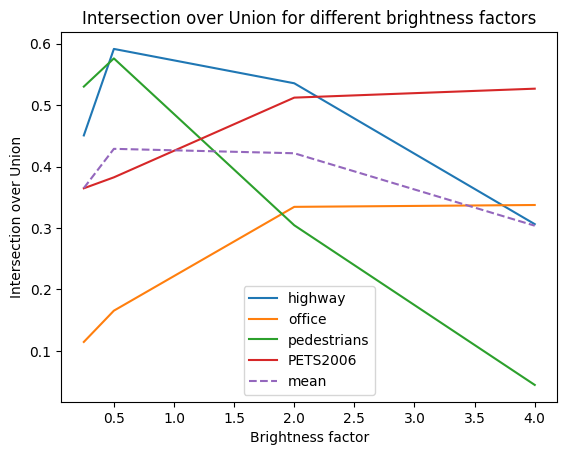

In [16]:
plot_intersection_over_union_brightness = {}
for dataset in datasets:
    plot_intersection_over_union_brightness[dataset] = []
    for factor in factors:
        plot_intersection_over_union_brightness[dataset].append(np.mean(intersection_over_union_brightness[factor][dataset]))

#Calculate the mean of the intersection over union for each dataset
plot_intersection_over_union_brightness['mean'] = [0 for i in range(len(factors))]
for factor in factors:
    for dataset in datasets:
        plot_intersection_over_union_brightness['mean'][factors.index(factor)] += np.mean(intersection_over_union_brightness[factor][dataset])
plot_intersection_over_union_brightness['mean'] = [x / 4 for x in plot_intersection_over_union_brightness['mean']]

plt.figure()
for dataset in datasets:
    plt.plot(factors, plot_intersection_over_union_brightness[dataset], label=dataset)
plt.plot(factors, plot_intersection_over_union_brightness['mean'], label='mean', linestyle='--')
plt.xlabel('Brightness factor')
plt.ylabel('Intersection over Union')
plt.title('Intersection over Union for different brightness factors')
plt.legend()
plt.show()

Résultats avec un floutage différent

In [17]:
datasets = ['highway', 'office', 'pedestrians', 'PETS2006']
blurr_parameter = [5,15,35]
intersection_over_union_blurred = {}

for parameter in blurr_parameter:
    intersection_over_union_blurred[parameter] = {}
    for dataset in datasets:
        intersection_over_union_blurred[parameter][dataset] = []

for parameter in blurr_parameter:
    for dataset in datasets:
        input = 'dataset_blurred/dataset/baseline/' + dataset + '/input_blurred_'+str(parameter)+'/'
        groundtruth = 'dataset/dataset/baseline/' + dataset + '/groundtruth/'
        
        input_files = os.listdir(input)
        
        groundtruth_files = os.listdir(groundtruth)
        
        fgbg = cv2.createBackgroundSubtractorMOG2(varThreshold=20)
        fgmask = fgbg.apply(cv2.imread(input + input_files[0]))
        for picture in groundtruth_files:
            number = int(picture[2:-4])
            
            input_name = input_files[number-1]
            
            input_image = cv2.imread(input + input_name)
            groundtruth_image = cv2.imread(groundtruth + picture)
            
            fgmask = fgbg.apply(input_image)
            
            mask_array = np.array(fgmask,dtype=bool)
            groundtruth_array = np.array(groundtruth_image[:,:,0],dtype=bool)
            
            overlap = mask_array*groundtruth_array
            union = mask_array+groundtruth_array
            
            IOU = overlap.sum()/float(union.sum())
            intersection_over_union_blurred[parameter][dataset].append(IOU)
            
for parameter in blurr_parameter:
    for dataset in datasets:
        intersection_over_union_blurred[parameter][dataset] = np.nan_to_num(intersection_over_union_blurred[parameter][dataset], nan=0)

C:\Users\marc1\AppData\Local\Temp\ipykernel_204\1185176088.py:37: RuntimeWarning: invalid value encountered in divide
  IOU = overlap.sum()/float(union.sum())


In [18]:
for dataset in datasets:
    print("***************************")
    print('Dataset: ' + dataset)
    print(" ")
    for parameter in blurr_parameter:
        print('Parameter: ' + str(parameter))
        print('Moyenne: ' + str(np.mean(intersection_over_union_blurred[parameter][dataset])))
        print('Medianne: ' + str(np.median(intersection_over_union_blurred[parameter][dataset])))
        print('Ecart-type: ' + str(np.std(intersection_over_union_blurred[parameter][dataset])))
        print('Max: ' + str(np.max(intersection_over_union_blurred[parameter][dataset])))
        print('Min: ' + str(np.min(intersection_over_union_blurred[parameter][dataset])))
        print(' ')

***************************
Dataset: highway
 
Parameter: 5
Moyenne: 0.7169372097963089
Medianne: 0.786058892031276
Ecart-type: 0.1782699213353657
Max: 0.919419385471071
Min: 0.0759493670886076
 
Parameter: 15
Moyenne: 0.6333459815289356
Medianne: 0.6963732458538363
Ecart-type: 0.19835980037584858
Max: 0.8993451152776532
Min: 0.0
 
Parameter: 35
Moyenne: 0.4745108267548335
Medianne: 0.5116822429906542
Ecart-type: 0.19248258369890042
Max: 0.7996158002161123
Min: 0.0
 
***************************
Dataset: office
 
Parameter: 5
Moyenne: 0.2623587655289767
Medianne: 0.23001771124950007
Ecart-type: 0.17349072018334696
Max: 0.7751479289940828
Min: 0.0
 
Parameter: 15
Moyenne: 0.22475870551559604
Medianne: 0.19338516598790573
Ecart-type: 0.1703104979291901
Max: 0.5875989181608735
Min: 0.0
 
Parameter: 35
Moyenne: 0.1548937632138697
Medianne: 0.11374578719306692
Ecart-type: 0.14459720270874946
Max: 0.4709819382048226
Min: 0.0
 
***************************
Dataset: pedestrians
 
Parameter: 5
Mo

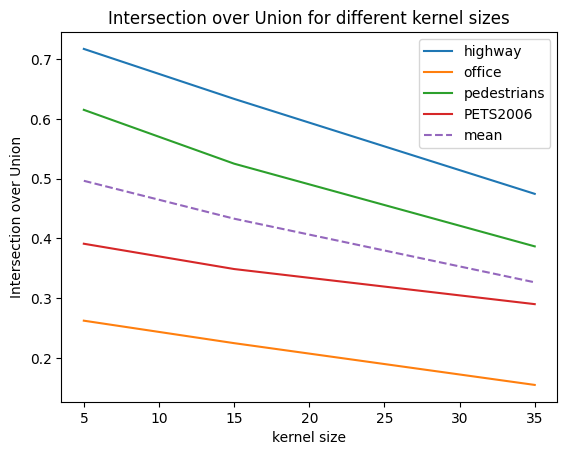

In [19]:
plot_intersection_over_union_blurred = {}
for dataset in datasets:
    plot_intersection_over_union_blurred[dataset] = []
    for parameter in blurr_parameter:
        plot_intersection_over_union_blurred[dataset].append(np.mean(intersection_over_union_blurred[parameter][dataset]))
        
#Calculate the mean of the intersection over union for each dataset
plot_intersection_over_union_blurred['mean'] = [0 for i in range(len(blurr_parameter))]
for parameter in blurr_parameter:
    for dataset in datasets:
        plot_intersection_over_union_blurred['mean'][blurr_parameter.index(parameter)] += np.mean(intersection_over_union_blurred[parameter][dataset])
plot_intersection_over_union_blurred['mean'] = [x / 4 for x in plot_intersection_over_union_blurred['mean']]

plt.figure()
for dataset in datasets:
    plt.plot(blurr_parameter, plot_intersection_over_union_blurred[dataset], label=dataset)
plt.plot(blurr_parameter, plot_intersection_over_union_blurred['mean'], label='mean', linestyle='--')
plt.xlabel('kernel size')
plt.ylabel('Intersection over Union')
plt.title('Intersection over Union for different kernel sizes')
plt.legend()
plt.show()

Résultats avec les observations partielles

In [20]:
datasets = ['highway', 'office', 'pedestrians', 'PETS2006']
partial_datasets = {
    'highway': [x for x in range(600,650 +1)],
    'office': [x for x in range(582,600 +1)],
    'pedestrians': [x for x in range(305,315 +1)] + [x for x in range(460,465 +1)],
    'PETS2006': [x for x in range(1185,1192 +1)] + [x for x in range(900,930 +1)]
}
intersection_over_union_partial = {}

for dataset in datasets:
    intersection_over_union_partial[dataset] = []


for dataset in datasets:
    input = 'dataset/dataset/baseline/' + dataset + '/input/'
    groundtruth = 'dataset/dataset/baseline/' + dataset + '/groundtruth/'
    
    input_files = os.listdir(input)
    groundtruth_files = os.listdir(groundtruth)
    
    fgbg = cv2.createBackgroundSubtractorMOG2(varThreshold=20)
    fgmask = fgbg.apply(cv2.imread(input + input_files[0]))
    for picture in groundtruth_files:
        number = int(picture[2:-4])
        
        if number in partial_datasets[dataset]:
            input_name = input_files[number-1]
            
            input_image = cv2.imread(input + input_name)
            groundtruth_image = cv2.imread(groundtruth + picture)
            
            fgmask = fgbg.apply(input_image)
            
            mask_array = np.array(fgmask,dtype=bool)
            groundtruth_array = np.array(groundtruth_image[:,:,0],dtype=bool)
            
            overlap = mask_array*groundtruth_array
            union = mask_array+groundtruth_array
            
            IOU = overlap.sum()/float(union.sum())
            intersection_over_union_partial[dataset].append(IOU)

In [21]:
for dataset in datasets:
    print('Dataset: ' + dataset)
    print('Moyenne: ' + str(np.mean(intersection_over_union_partial[dataset])))
    print('Medianne: ' + str(np.median(intersection_over_union_partial[dataset])))
    print('Ecart-type: ' + str(np.std(intersection_over_union_partial[dataset])))
    print('Max: ' + str(np.max(intersection_over_union_partial[dataset])))
    print('Min: ' + str(np.min(intersection_over_union_partial[dataset])))
    print('')

Dataset: highway
Moyenne: 0.5119431604426818
Medianne: 0.524024024024024
Ecart-type: 0.14597087574901021
Max: 0.7338441039307129
Min: 0.113143343258188

Dataset: office
Moyenne: 0.4964710058835862
Medianne: 0.5176625949158138
Ecart-type: 0.09861734820204389
Max: 0.5909797822706065
Min: 0.136318407960199

Dataset: pedestrians
Moyenne: 0.5072669619539939
Medianne: 0.5500910746812386
Ecart-type: 0.14388561773406172
Max: 0.612668743509865
Min: 0.029096751160299892

Dataset: PETS2006
Moyenne: 0.410349450185401
Medianne: 0.3905878494711814
Ecart-type: 0.07265819223957701
Max: 0.5552436003303055
Min: 0.2548229196659948

